In [ ]:
# Ethan Chang, M.S Applied and Computational Mathematics @ JHU
# echang54@jh.edu
# 10/15/2025
# Module 8 Discussion

# Dataset used: (1) Petroleum Use, Domestic Supply, and Net Imports, (2) Average Annual Retail Price of Gasoline
# Questions/Goals: (1) Visualize the data, (2) See if Petroleum use is correlated with price
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load Petroleum Use/Supply Data
gas_data = pd.read_excel("use_supply.xlsx", skiprows=[0, 1, 77, 78])
gas_data = gas_data.rename(columns={"Unnamed: 0": "Year"})
gas_data["Demand"] = gas_data["Petroleum Use"] - gas_data["U.S. Supply"] - gas_data["Net Imports"]

display(gas_data)
print(gas_data.columns)

,Year,U.S. Supply,Petroleum Use,Net Imports,Demand
0,1950,5912.836,6457.918,545.082,3.410605e-13
1,1951,6593.825,7016.132,422.307,-2.273737e-13
2,1952,6749.620,7269.617,519.997,3.410605e-13
3,1953,6967.002,7599.627,632.625,0.000000e+00
4,1954,7059.534,7756.033,696.499,-2.273737e-13
...,...,...,...,...,...
69,2019,19873.010,20542.854,669.844,9.094947e-13
70,2020,18820.775,18185.909,-634.866,-1.818989e-12
71,2021,19951.757,19889.880,-61.877,-4.050094e-13
72,2022,21201.214,20010.205,-1191.009,1.818989e-12


Index(['Year', 'U.S. Supply', 'Petroleum Use', 'Net Imports', 'Demand'], dtype='object')


In [48]:
# Load gas price data
gas_price = pd.read_excel("gas_price.xlsx", skiprows=[0, 1, *range(77, 91)])
gas_price = gas_price.drop(columns=["Unnamed: 0"])
gas_price = gas_price.rename(columns={"Gasoline Price (2023 $/gallon)": "Inflation Adjusted Price"})

display(gas_price)

,Year,Gasoline Price ($/gallon),Inflation Adjuster,Inflation Adjusted Price
0,1950,0.268,12.28,3.29104
1,1951,0.272,11.59,3.15248
2,1952,0.274,11.50,3.15100
3,1953,0.287,11.41,3.27467
4,1954,0.290,11.50,3.33500
...,...,...,...,...
69,2019,2.640,1.19,3.14160
70,2020,2.170,1.18,2.56060
71,2021,3.050,1.10,3.35500
72,2022,4.094,1.03,4.21682


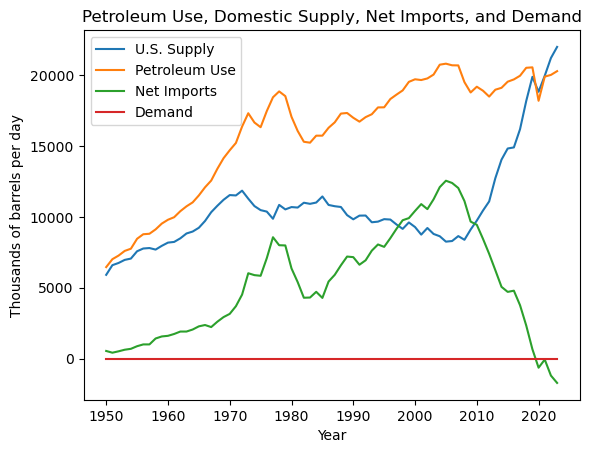

In [40]:
# Visualize the data
gas_data.plot(x="Year", y=["U.S. Supply", "Petroleum Use", "Net Imports", "Demand"])
plt.title("Petroleum Use, Domestic Supply, Net Imports, and Demand")
plt.xlabel("Year")
plt.ylabel("Thousands of barrels per day")
plt.show()

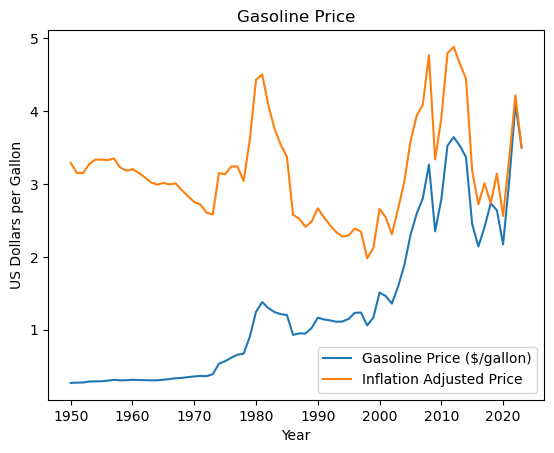

In [49]:
gas_price.plot(x="Year", y=["Gasoline Price ($/gallon)", "Inflation Adjusted Price"])
plt.title("Gasoline Price")
plt.xlabel("Year")
plt.ylabel("US Dollars per Gallon")
plt.show()

Text(0.05, 0.95, 'Correlation: 0.028')

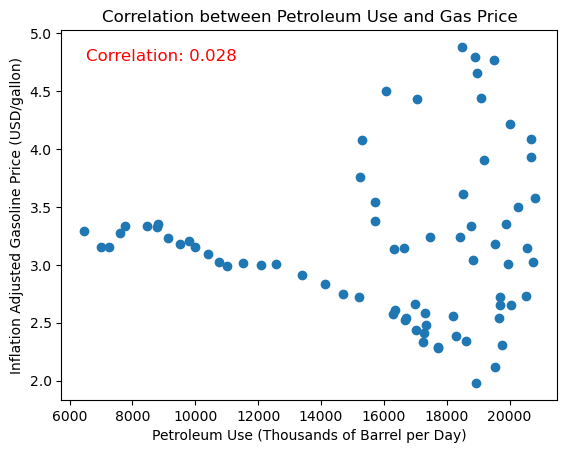

In [ ]:
correlation = gas_data["Petroleum Use"].corr(gas_price["Inflation Adjusted Price"])
plt.scatter(gas_data["Petroleum Use"], gas_price["Inflation Adjusted Price"])
plt.title("Correlation between Petroleum Use and Gas Price")
plt.xlabel("Petroleum Use (Thousands of Barrel per Day)")
plt.ylabel("Inflation Adjusted Gasoline Price (USD/gallon)")
plt.text(0.05, 0.95, f'Correlation: {correlation:.3f}',
         transform=plt.gca().transAxes, fontsize=12, color='red',
         verticalalignment='top')
